In [7]:
import pickle
import torch
import numpy as np

from utils import get_datasets, run_training, get_accuracy, visualise_datasets, visualise_active_learning_experiments, run_experiments
from networks import LeNet
from acquisition_functions import random

SEED = 1

         size    mean    std
-----  ------  ------  -----
train      20   0.028  1.033
pool   59_880  -0.000  1.000
val       100  -0.004  0.997
test   10_000   0.005  1.008


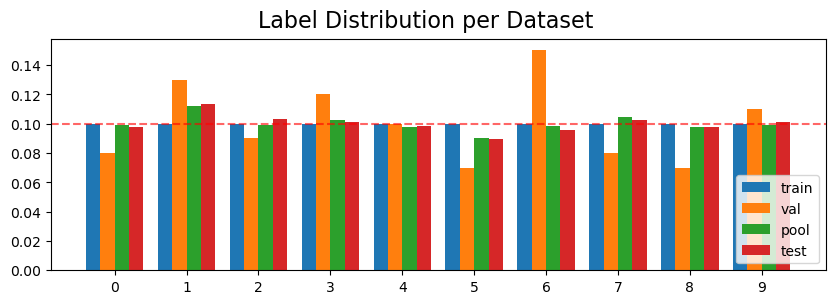

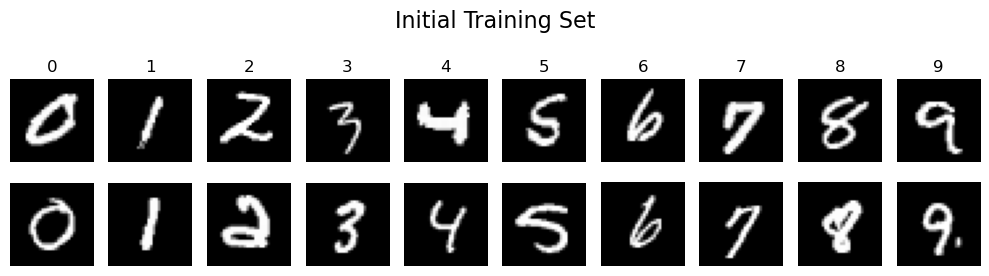

In [4]:
torch.manual_seed(SEED)
np.random.seed(SEED)

# get dataset, these are given as torch tensors
X_train, y_train, X_pool, y_pool, X_val, y_val, X_test, y_test = get_datasets()

# get val and test set and loader, these stay constant 
val_set = torch.utils.data.TensorDataset(X_val, y_val)
test_set = torch.utils.data.TensorDataset(X_test, y_test)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=True)

# Printing and visualising some useful information
visualise_datasets(X_train, y_train, X_pool, y_pool, X_val, y_val, X_test, y_test)

# Active Learning Experiments

Experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Runs per Experiment:   0%|          | 0/2 [00:00<?, ?it/s]

Acquisition Steps:   0%|          | 0/2 [00:00<?, ?it/s]

Training Epochs with Training size 20: 0it [00:00, ?it/s]

Training Epochs with Training size 30: 0it [00:00, ?it/s]

Acquisition Steps:   0%|          | 0/2 [00:00<?, ?it/s]

Training Epochs with Training size 20: 0it [00:00, ?it/s]

Training Epochs with Training size 30: 0it [00:00, ?it/s]

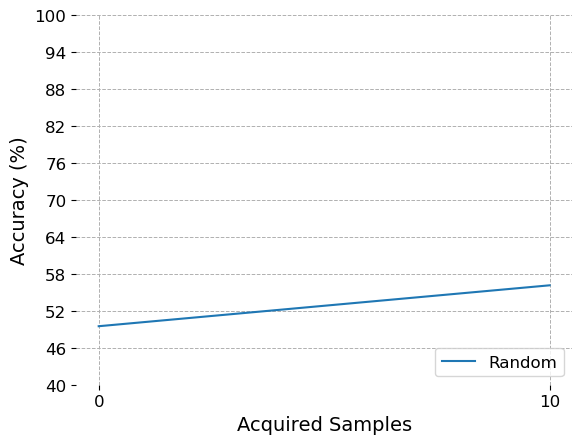

In [6]:
torch.manual_seed(SEED)
np.random.seed(SEED)

base_experiment = {'acquisition_function': None,
                   'n_acquisition_steps': 2,
                   'n_samples_to_acquire': 10,
                   'n_epochs': 100}

random_params = base_experiment.copy()
random_params['acquisition_function'] = random

experiments = [random_params]
experiment_results, save_path = run_experiments(experiments,
                                                X_train, y_train,
                                                X_pool, y_pool,
                                                val_loader, test_loader,
                                                n_runs=2)

/Users/pascalpilz/miniconda3/envs/al/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


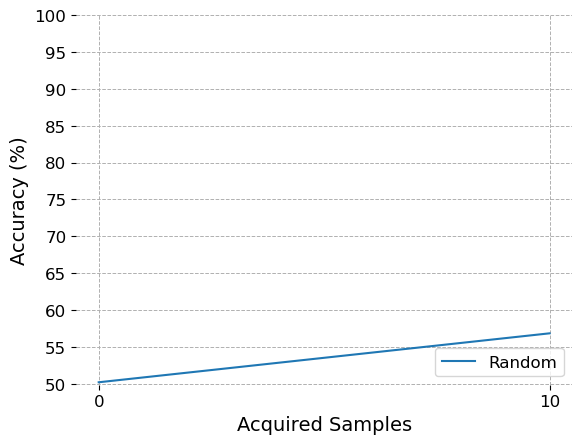

In [8]:
with open(save_path, 'rb') as handle:
    loaded_experiment_results = pickle.load(handle)
    
visualise_active_learning_experiments(loaded_experiment_results)